In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv(r'C:\Users\hyper\OneDrive\Desktop\Internship\Project2\ecommerce_online_sales.csv')

In [8]:
df.head(10)

,Return_ID,Order_ID,Customer_ID,Product_Name,Category,Geography,Marketing_Channel,Return_Reason
0,R0001,O31225,C5857,Basketball,Sports,Europe,Referral,Size or fit issue
1,R0002,O70032,C8276,Tablet,Electronics,South America,Email,Unauthorized purchase
2,R0003,O72949,C5142,T-shirt,Apparel,South America,Email,Size or fit issue
3,R0004,O34578,C4530,Jeans,Apparel,South America,Social Media,Wrong item sent
4,R0005,O71256,C5393,Basketball,Sports,Asia,Email,Found better price elsewhere
5,R0006,O11199,C5531,Blender,Home & Kitchen,North America,Organic Search,Size or fit issue
6,R0007,O77718,C9338,Biography,Books,Asia,Paid Ads,Item defective or damaged
7,R0008,O11650,C8317,Jacket,Apparel,North America,Organic Search,Wrong item sent
8,R0009,O36207,C9019,Basketball,Sports,Europe,Email,Item arrived late
9,R0010,O77767,C9633,Toaster,Home & Kitchen,Asia,Social Media,Item arrived late


In [15]:
# Data Cleaning
df.isnull().sum()# Data is Already Cleaned.

Return_ID            0
Order_ID             0
Customer_ID          0
Product_Name         0
Category             0
Geography            0
Marketing_Channel    0
Return_Reason        0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Return_ID          1000 non-null   object
 1   Order_ID           1000 non-null   object
 2   Customer_ID        1000 non-null   object
 3   Product_Name       1000 non-null   object
 4   Category           1000 non-null   object
 5   Geography          1000 non-null   object
 6   Marketing_Channel  1000 non-null   object
 7   Return_Reason      1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [11]:
df.describe(include='all')

,Return_ID,Order_ID,Customer_ID,Product_Name,Category,Geography,Marketing_Channel,Return_Reason
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,991,938,30,6,5,5,10
top,R1000,O87012,C8104,Jeans,Home & Kitchen,South America,Referral,Unauthorized purchase
freq,1,2,2,40,189,213,203,109


In [12]:
df.nunique()

Return_ID            1000
Order_ID              991
Customer_ID           938
Product_Name           30
Category                6
Geography               5
Marketing_Channel       5
Return_Reason          10
dtype: int64

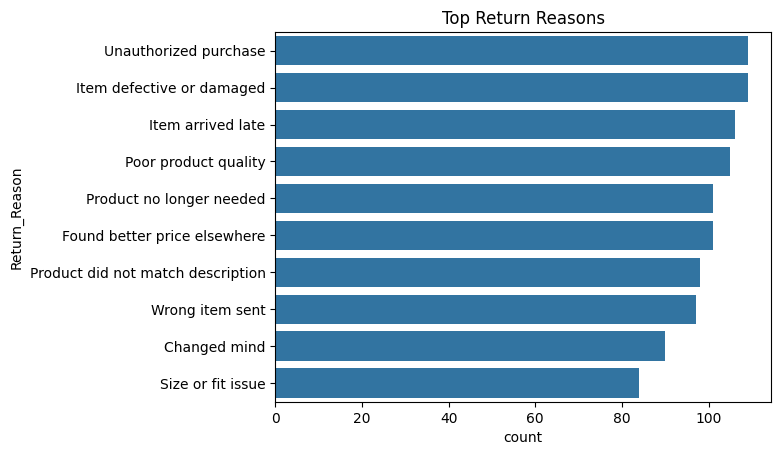

In [16]:
# Visualize overall return distribution.
sns.countplot(y='Return_Reason', data=df, order=df['Return_Reason'].value_counts().index)
plt.title('Top Return Reasons')
plt.show()

In [25]:
# return_rate by Category.
category_returns = df['Category'].value_counts().reset_index()
category_returns.columns = ['Category','Count']

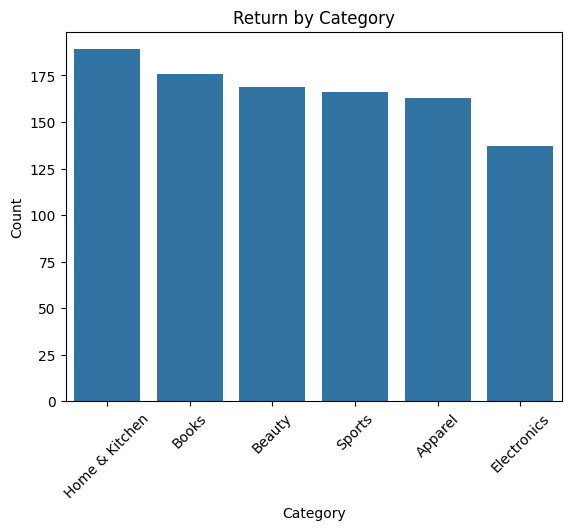

In [26]:
sns.barplot(x='Category', y='Count', data=category_returns)
plt.title('Return by Category')
plt.xticks(rotation=45)
plt.show()

In [27]:
# return_rate by Geography.
geography_returns = df['Geography'].value_counts().reset_index()
geography_returns.columns = ['Geography','Count']

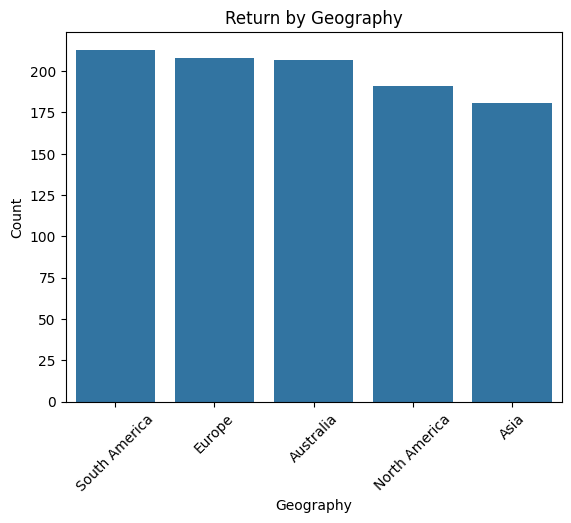

In [28]:
sns.barplot(x='Geography', y='Count', data=geography_returns)
plt.title('Return by Geography')
plt.xticks(rotation=45)
plt.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Referral'),
  Text(1, 0, 'Email'),
  Text(2, 0, 'Social Media'),
  Text(3, 0, 'Organic Search'),
  Text(4, 0, 'Paid Ads')])

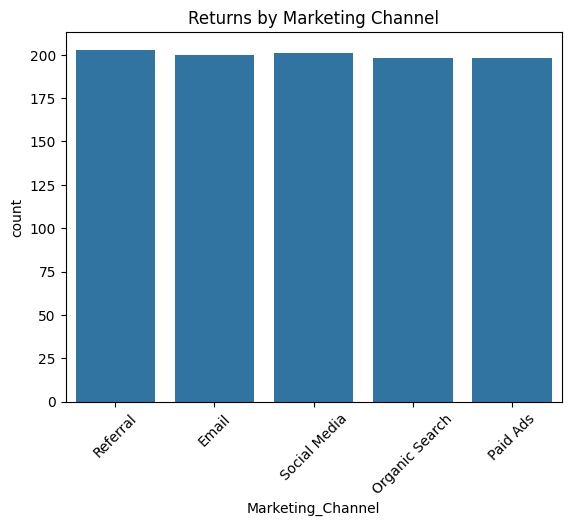

In [29]:
# return by Marketing_Channel.
sns.countplot(x='Marketing_Channel', data=df)
plt.title("Returns by Marketing Channel")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Return Reason by Category')

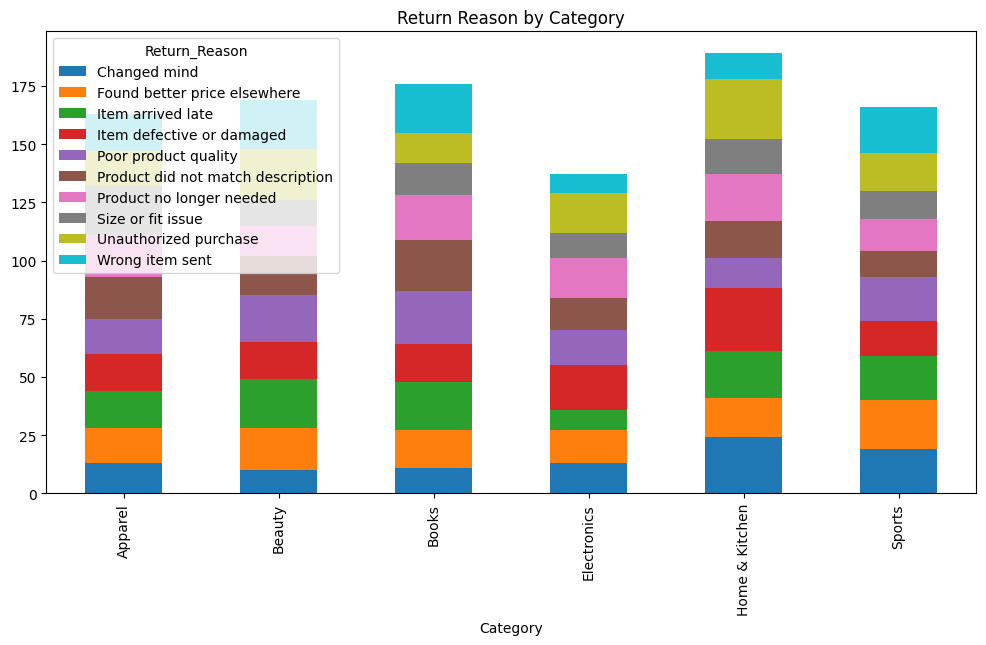

In [30]:
# Category vs Reasons
pd.crosstab(df['Category'],df['Return_Reason']).plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Return Reason by Category')

Text(0.5, 1.0, 'Return Reason by Marketing_Channel')

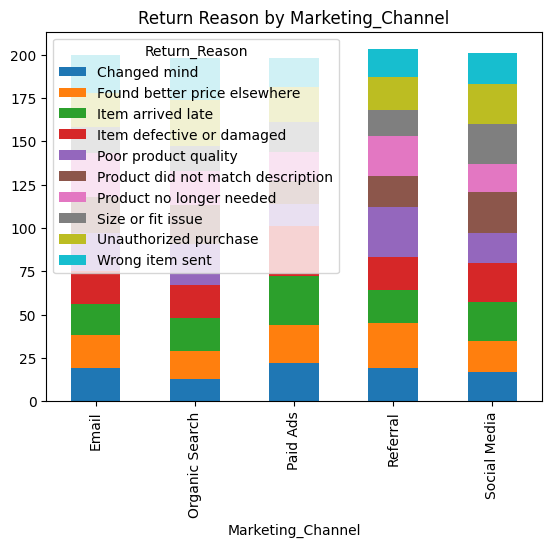

In [31]:
# Marketing_Channel vs Reasons
pd.crosstab(df['Marketing_Channel'], df['Return_Reason']).plot(kind='bar', stacked=True)
plt.title('Return Reason by Marketing_Channel')

Text(0.5, 1.0, 'Top 10 Returned Prodcuts.')

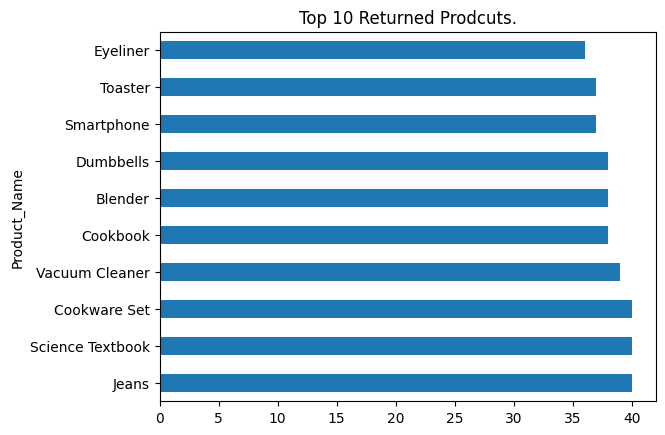

In [33]:
# Top 10 Returned products.
df['Product_Name'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Returned Prodcuts.')

Text(0.5, 1.0, 'Top 10 Returning Customers.')

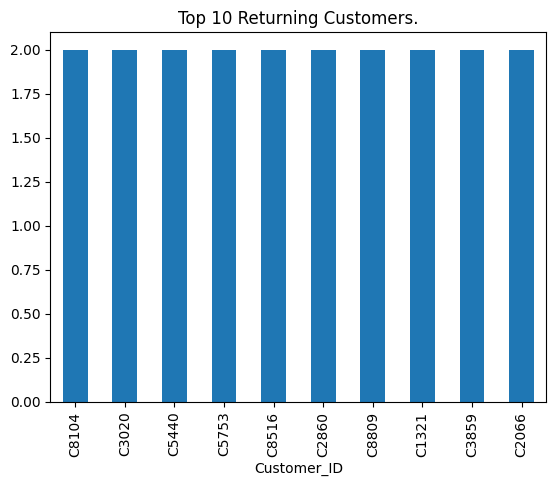

In [35]:
# Top 10 Most Returned Customers.
df['Customer_ID'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Returning Customers.')